# Data Mining

Originally a statistical term of art for overusing data to draw invalid inferences

*"Bonferroni's theorem tells us that if there are many possible conclusions to draw, some of them will be true statistical reasons with no physical validity"*

## Data mining, the original meaning
<img src="https://imgs.xkcd.com/comics/significant.png" width="250" height="250" />


## Thoughts on the need for data-mining

*"Drowning in Data yet Starving for Knowledge"* - unknown 

*"Computers have promised us a fountain of wisdom but delivered a flood of data"* - William J. Frawley, Gregory Piatetsky-Shapiro, and Christopher J. Matheus

*"Where is the wisdom we have lost in knowledge? Where is the knowledge we
have lost in information?"* - T.S Eliot
<img src="http://www.ncbi.nlm.nih.gov/core/assets/genbank/images/genbankgrowth.jpg" width="250" height="250" />


## What Data Mining isn't: 

<s> *Data Mining, noun: “Torturing data until it confesses ... and if you torture it
enough, it will confess to anything”* </s>

<s> *"An Unethical Econometric practice of massaging and manipulating the data to
obtain the desired results*" </s>

Times change and words change with the times. (*Tempora mutantur, nos et mutamur in illis*, more or less)


## Current Day Examples of Data Mining

* Traveler patterns studied/analysed to manage the sale of discounted seats/hotel rooms rooms. 

* The connection between diapers and beer. From the user of data mining it was observed that customers who buy diapers are more likely to by beer than average. Supermarkets then placed beer and diapers nearby, knowing many customers would walk between them. Placing potato chips between diapers and beer increased sales of all three items.

* Skycat and Sloan Digital Sky Survey - clustering sky objects by their radiation levels in different bands allowed astromomers to distinguish between galaxies, nearby stars,and many other kinds of celestial objects.

* Comparison of the genotype of people with/without a condition allowed the discovery of a set of genes that together account for many cases of diabetes. This sort of mining will become much more important as the human genome is constructed.

## Big data tolls for thee

<img src="http://i.imgur.com/gGs5f1d.png" width="300" height="400" />


## The Component Fields of data mining

* Statistics
* Mathematics
* Artifical Intelligence (*machine learning*)
* Visualization
* Information/Database sciences


## Stages of data mining
* <s>Denial</s> Data gathering (data warehousing, web crawling, semi-legal metadata collection)
* Data cleansing (elimating errors, corrupted data, unphysical outliers)
* Feature extraction (obtaining only the interesting attributes of the data; i.e. timestamp for data that has no reason to be time-dependent)
* Pattern extraction/discovery (the classical "data-mining" step)
* Visualization
* Evaluation of the results (not every discovered fact is useful or true.)
  * Use you judgement
  
<img src="http://sparrowism.soc.srcf.net/home/piratesarecool4.gif" width="400" height="300" />
  

# Clustering
* Clustering strives to indetify groups/clusters of objects that behave similarly/or have similar characteristics. 

*Similarity is ofter quantified via some sort of distance function. 

* Has different names in different contexts 
  * Segmentation method (market studies)
  * Unsupervised learning (neural network studies)

* Cluster is a technique which attempts to find order in apparently unordered data. 
  * Data may be discrete or continuous. 
  
We'll look at three types of clustering
 * Hierarchical clustering
 * K-means clustering
 * geometric clustering
  

## Hierarchical Clustering

Clustering data points based on a tree-like hierarchical relationships 

In **agglomerative hierarchical clustering**, the data is grouped in a bottom up fashion; every data point starts out as a cluster of 1, then you begin grouping similar objects. 

The opposite approach is **divisive hierarchical clustering**; everything start outs in the same cluster, then you begin breaking off clusters based on differences. 

**The most important concept for clustering is how you quantify "similarness" of two different data points. Often times this will be a "distance" in some space.**

Different clustering methods define this distance in different ways. 

## Measures of Distance

Natural concept for data points in physical space (x,y,z); use Euclidean distance formula. 

There are other ways of doing it as well (infinity norm / max norm) 

In stating the distance between two objects, you need to define your distance. 

Often, our objects are not in Euclidean space (colors in an image, amino acid codons, etc...), yet we still need to quantify the distance between them. 


## Measures of Distance

Let $A,\ B$ and $C$ be clusters (which may consist of a single or multiple objects). WE denote the distance between $A$ and $B$ as $d(A,B)$ where $d(\cdot,\cdot)$ satisfies the following general properties by definiton. 

1. $d(A,A) = 0$
2. $d(A,B) = d(B,A)$
3. $d(A,B) \ge 0$
4. $d(A,B) + d(B,C) \le d(A,C)$ 

If you decide on the Euclidean norm (or any vector norm), measuring the distance between two single objects is relatively simple; but how do define the distance between two groups of objects

* Nearest neigbhor, furthest, average, centroid

### Measures of distance example:

Imagine we have two words we want to quantify the distance between; You can define a path from the first word to the second word by changing one letter at a time to make another word (a legal word (scrabble legal)). 

Lets look at an example of the distance between GOLF and WORD

GOLF $\rightarrow$ GOLD $\rightarrow$ COLD $\rightarrow$ CORD $\rightarrow$ WORD

The distance in this metric is 4, for GOLF and WOLF it would be 1. 

This metric satisfies all of our neccesary properties of a distance. 


# Agglomerative Hierachical Clustering

Bottoms up grouping of objects. 

Starting with N objects we want to cluster, we let each object initially be it's own cluster. This gives us N clusters. 

Our first step is to pick the two closest (however we define it) clusters (objects in this first step) and form a cluster with them. We now have N-1 clusters and now record that in the first step,  clusters i and j were merged. 

Our second step, we again merge the two closest clusters. This may involve merging our two object cluster with a third, or merging two individial objects for a new cluster. 

We continue until we have a single cluster, or a user specified number of clusters. 

How do we define distance between one object, and a cluster of multiple objectss?

## Single Linkage Hierarchial Clustering

This clustering technique makes a specific choice for determining closeness between clusters; the distance between two clusters is the distance between the closest elements in the two clusters. 

<img src="http://i.imgur.com/AqylMZc.png" width="300" height="400" />


## SLHC
If $A$ consists of #n# objects $\alpha_i$ and $B$ consists of $m$ objects $\beta_j$, then the distance between $A$ and $B$ would be given as 

$$ d(A,B) = \min(d(\alpha_i,\beta_j)) \text{ for } i=1,n, j =1,m$$

The distance between all possible object pairs is computed, and the the minimum value of these is said to be the distance between clusters A and B. 

### Clustering in Python 
Lets initalize some stuff first. 

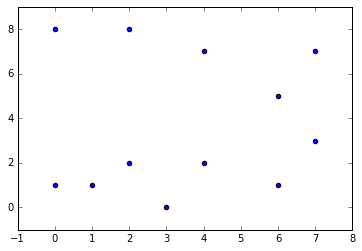

In [7]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
%matplotlib inline
np.set_printoptions(precision=5, suppress=True) 
a = [[3,0], [0,1], [1,1], [6,1], [2,2], [4,2], [7,3], [6,5], [4,7], [7,7], [0,8], [2,8]]

a = np.asarray(a)
plt.scatter(a[:,0], a[:,1])
plt.show()


### Clustering in Python
Now lets do some clustering

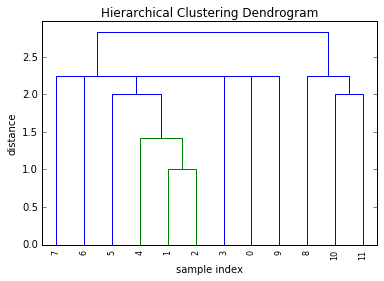

In [17]:
Z = linkage(a, 'single', 'euclidean')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
t = dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)


### Clustering in Python

<img src="http://i.imgur.com/pY1IX6Z.png" width="500" height="500" />

Single linkage clustering tends to cluster items due to one outlier in a cluster grabing vaguely close points. We can avoid this with complete linkage clustering. 


## Completed Linkage Hierarchical Clustering 

The opposite of SLHC. 
Looks at the maximum distance between objects in two clusters. 
$$ d(A,B) = \max(d(\alpha_i,\beta_j)) \text{ for } i=1,n, j =1,m$$

At each step, the two clusters with the minimalist maximum distance are clustered. 

<img src="http://i.imgur.com/aRDJwAC.png" width="400" height="400" />


### CLHC in Python

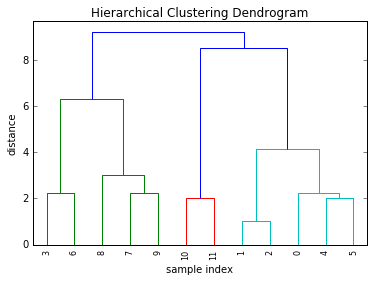

In [18]:
### CLHC in Python
Z = linkage(a, 'complete', 'euclidean')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
t = dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

## Other Hierachical clusterings 

* Average linkage hierarchical clustering
  * $d(A,B) = \frac{1}{mn} \sum_{i=1}^n\sum_{j=1}^m d(\alpha_i, \beta_j)$
  
* Centroid linkage hierarchical clusterings
  * $d(A,B) = ||\bar\alpha-\bar\beta||_2$
  
  $$\bar\alpha= \frac{1}{n}\sum_{i=1}^n \alpha_i$$
